In [1]:
from glob import glob
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.append("../../tools")
from plot_tools import plot_uv_map,plot_map_zoom
import xarray as xr
import matplotlib.pyplot as plt
import pickle
import gzip
import numpy
import netCDF4
import datetime
from datetime import timedelta, datetime
import os
from typing import Optional, Tuple

In [3]:
year = 2010

filenames_drifters = sorted(glob(f'/Odyssey/public/drifters/aoml/drifter_*_{year}.nc'))
ds_drifter = xr.open_mfdataset(filenames_drifters, combine='nested', concat_dim='date')
year_ds_drifter = ds_drifter.sel(date=ds_drifter["date.year"] == year)

year_ds_drifter = year_ds_drifter.compute()

year_ds_drifter_filtred = year_ds_drifter.where(year_ds_drifter['ums'] < 1000, drop=True)

2010


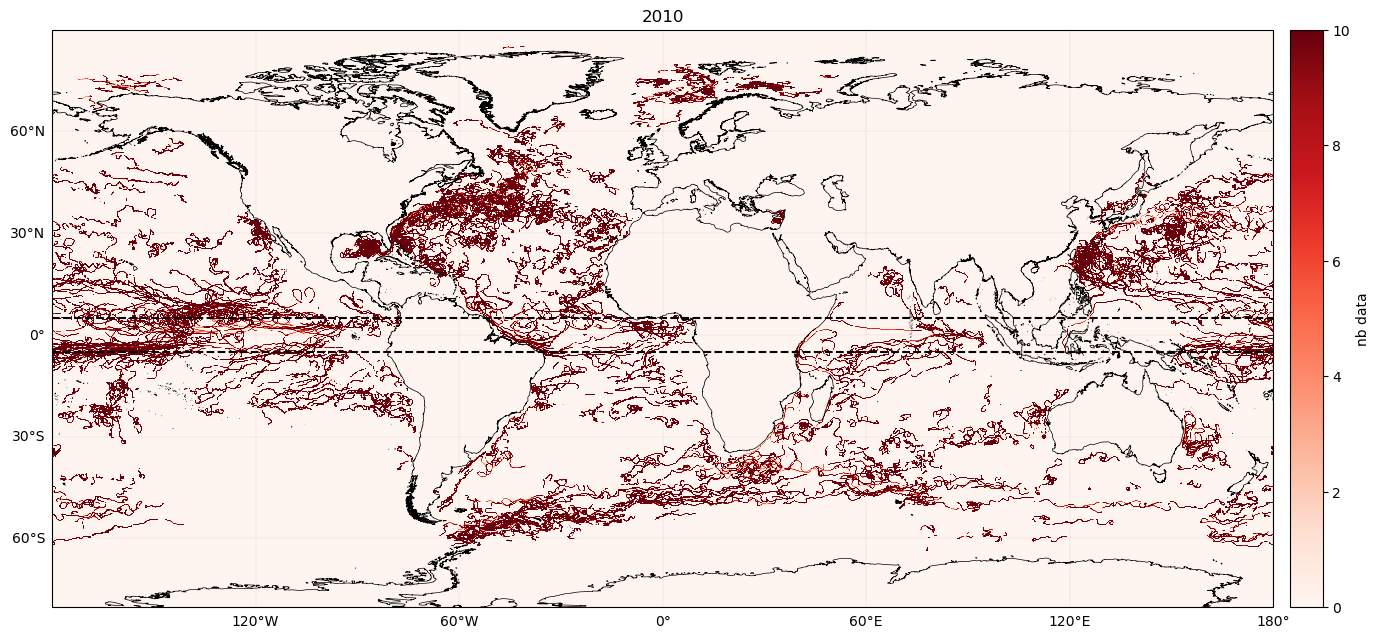

2011


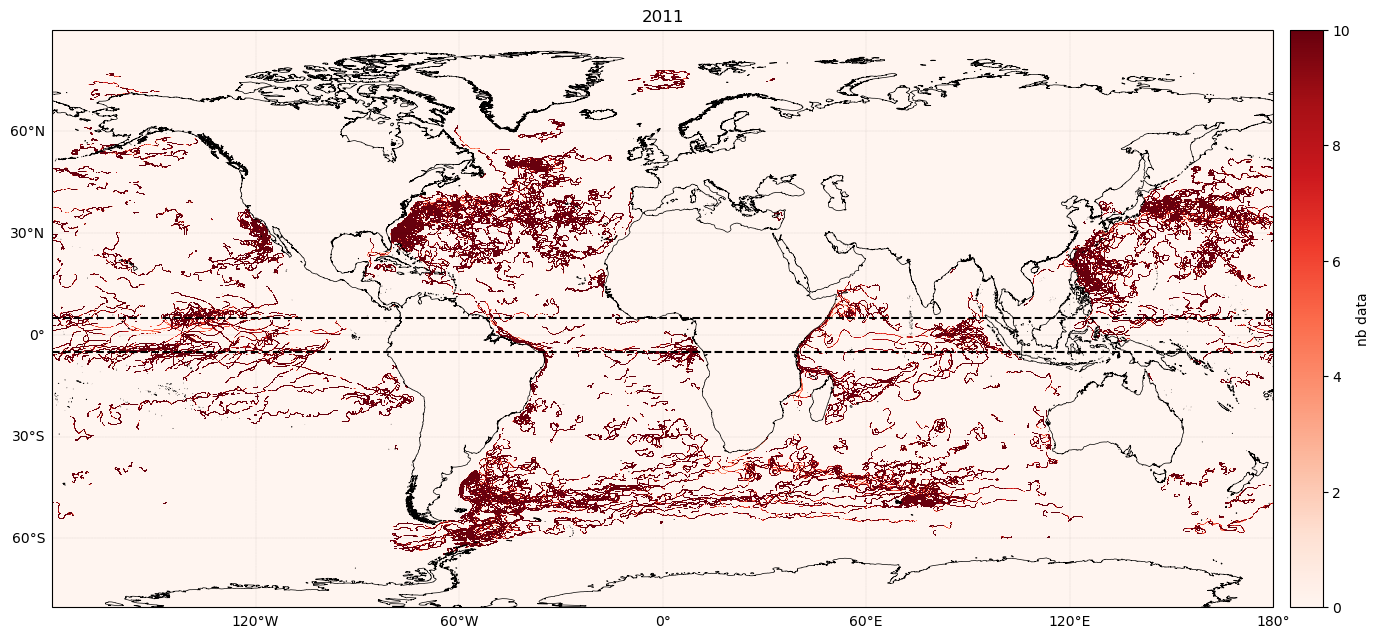

2012


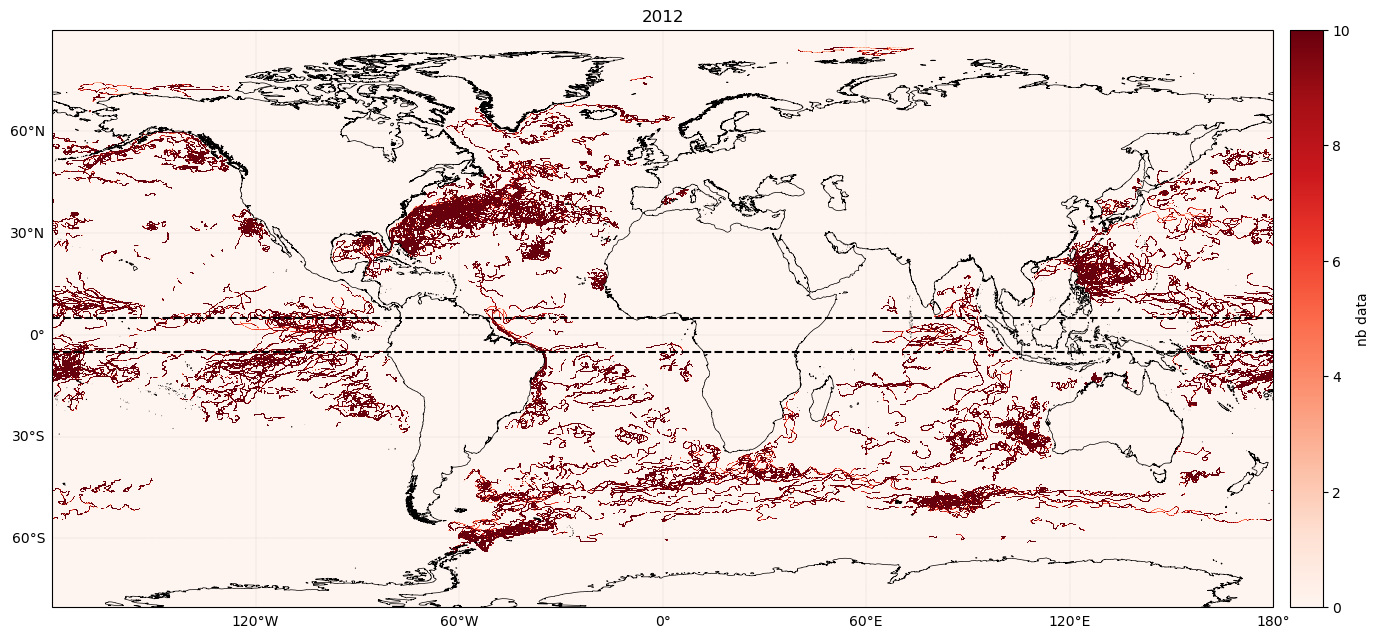

2013


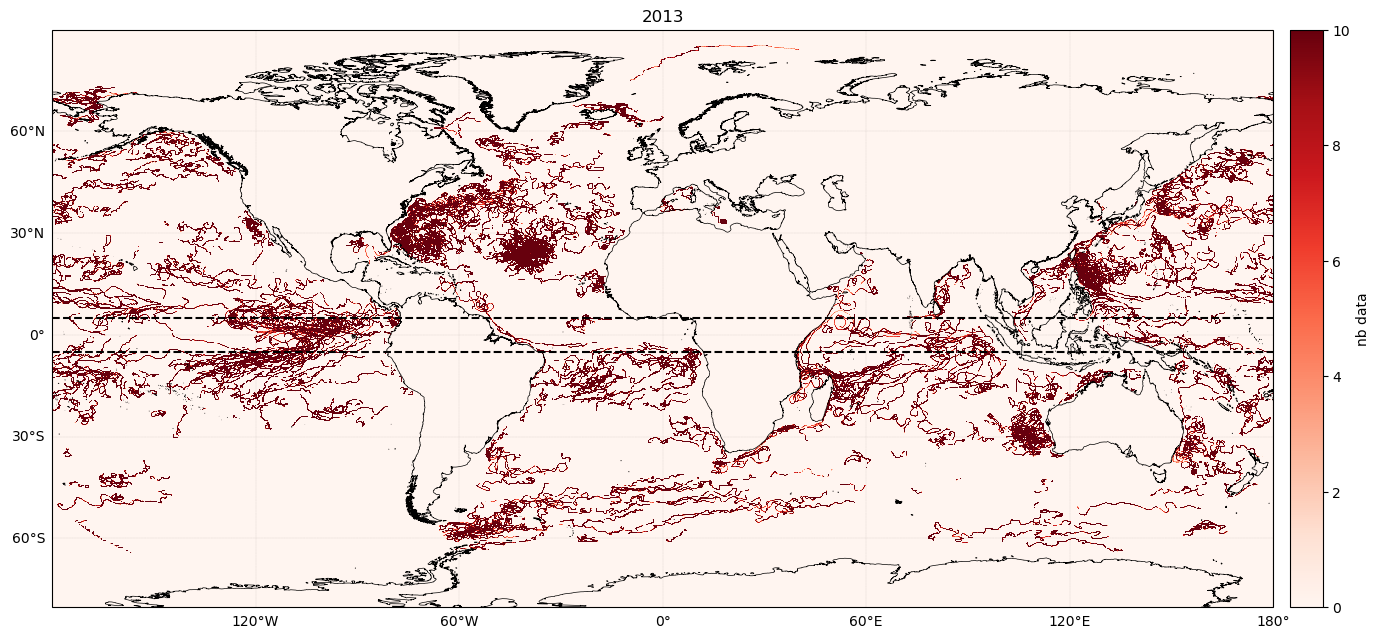

2014


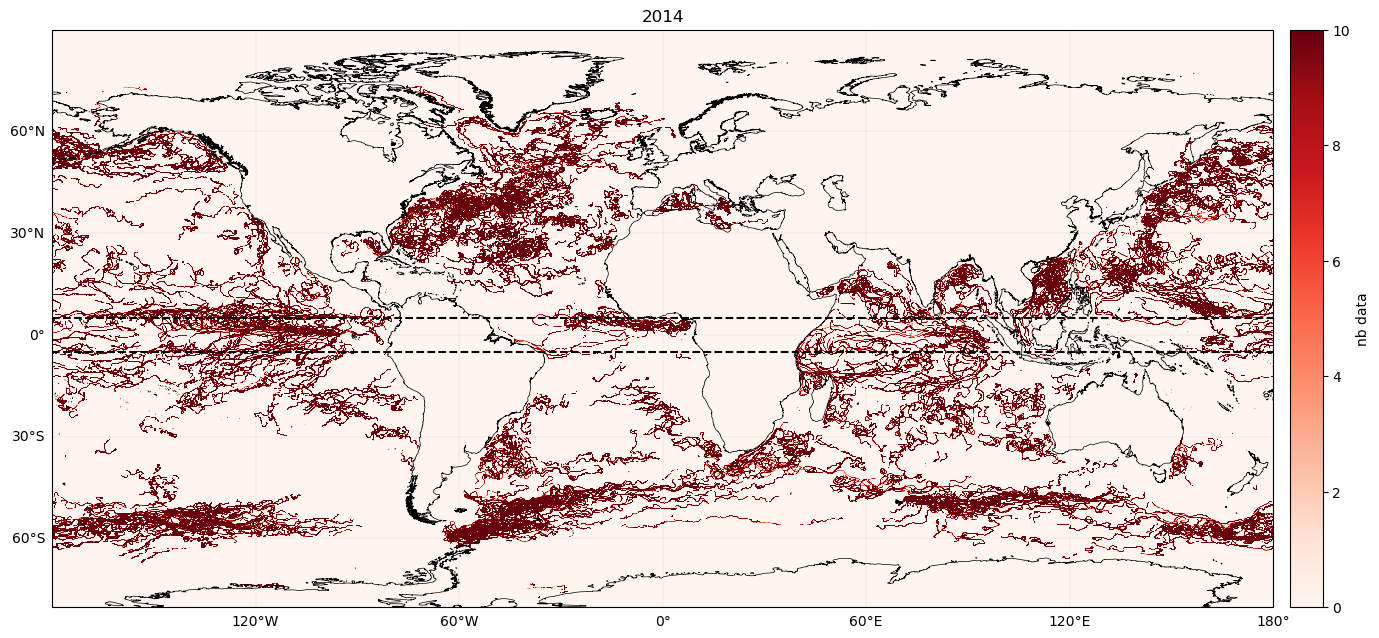

2015


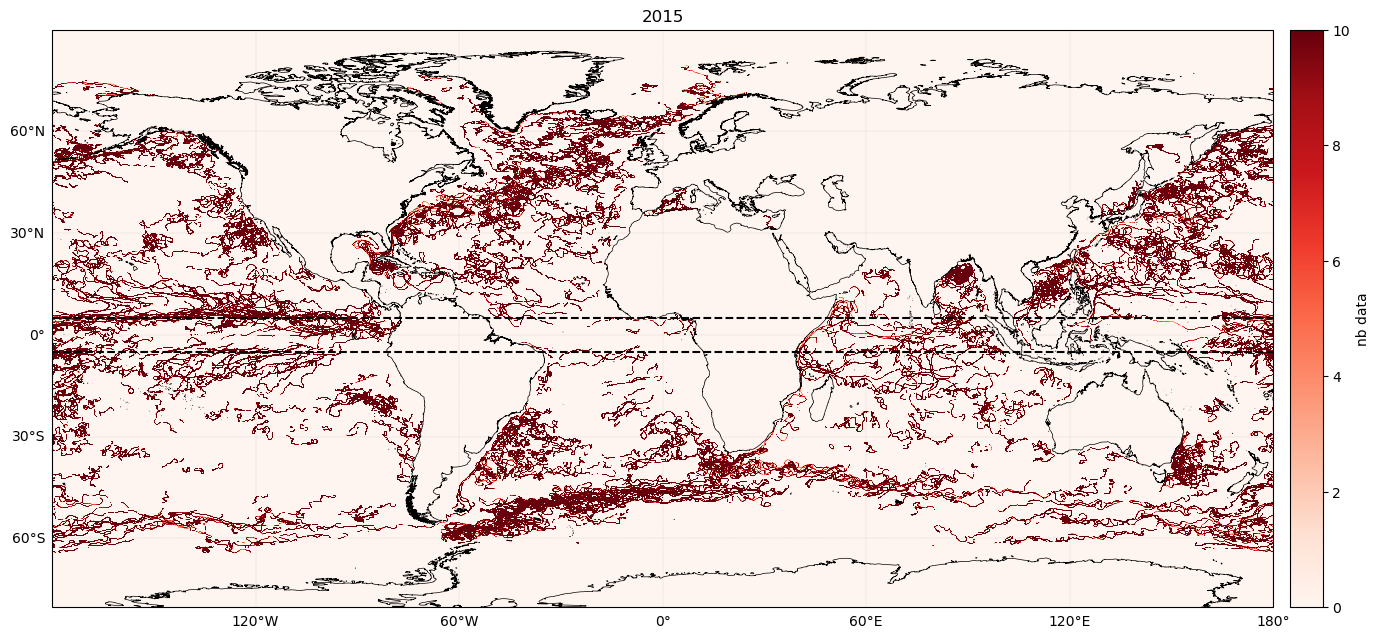

2016


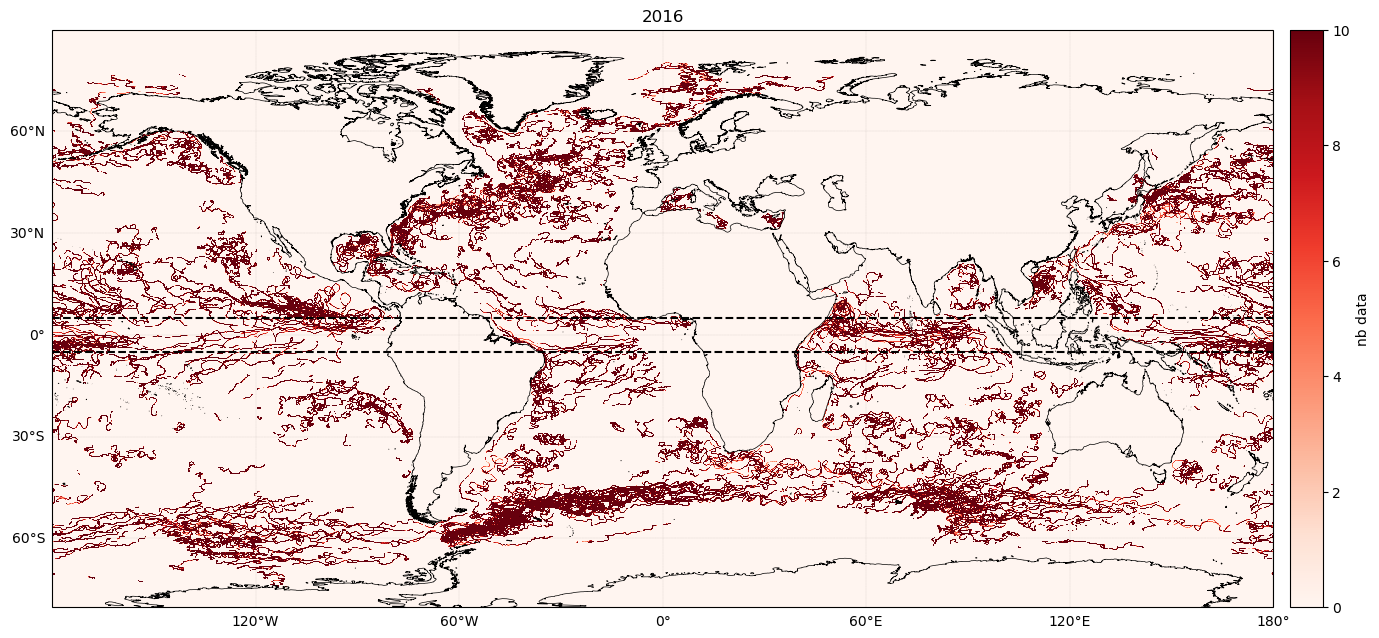

2017


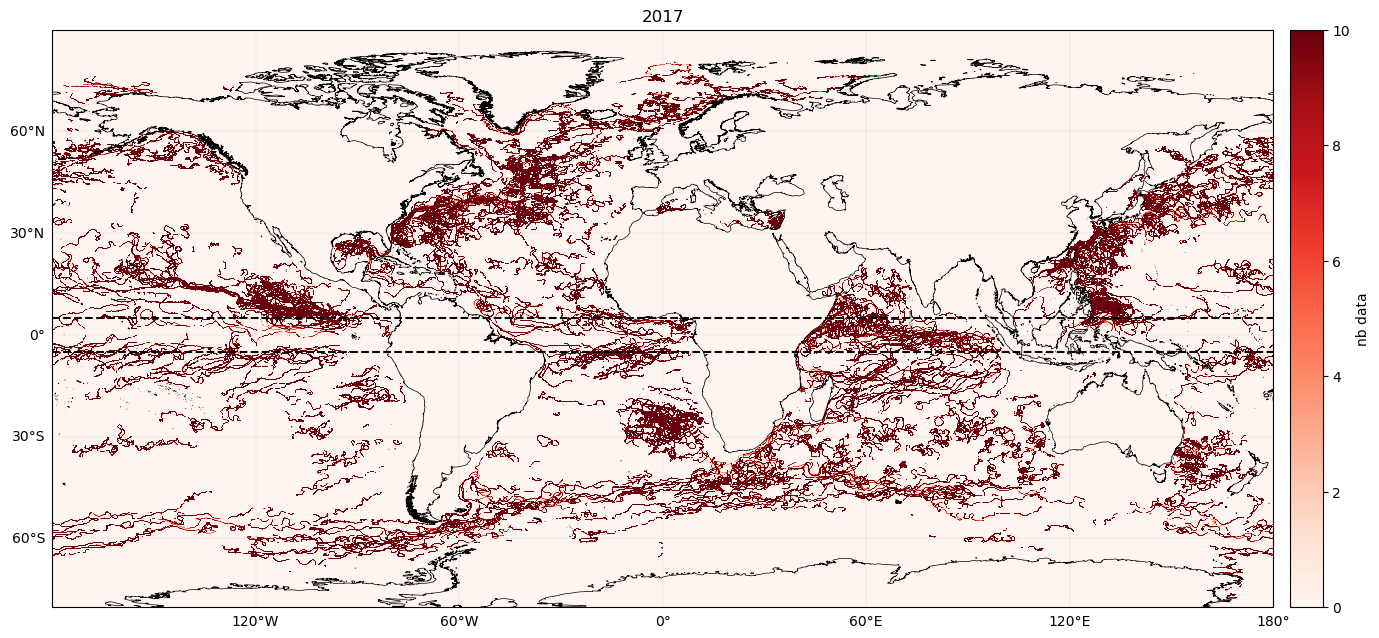

2018


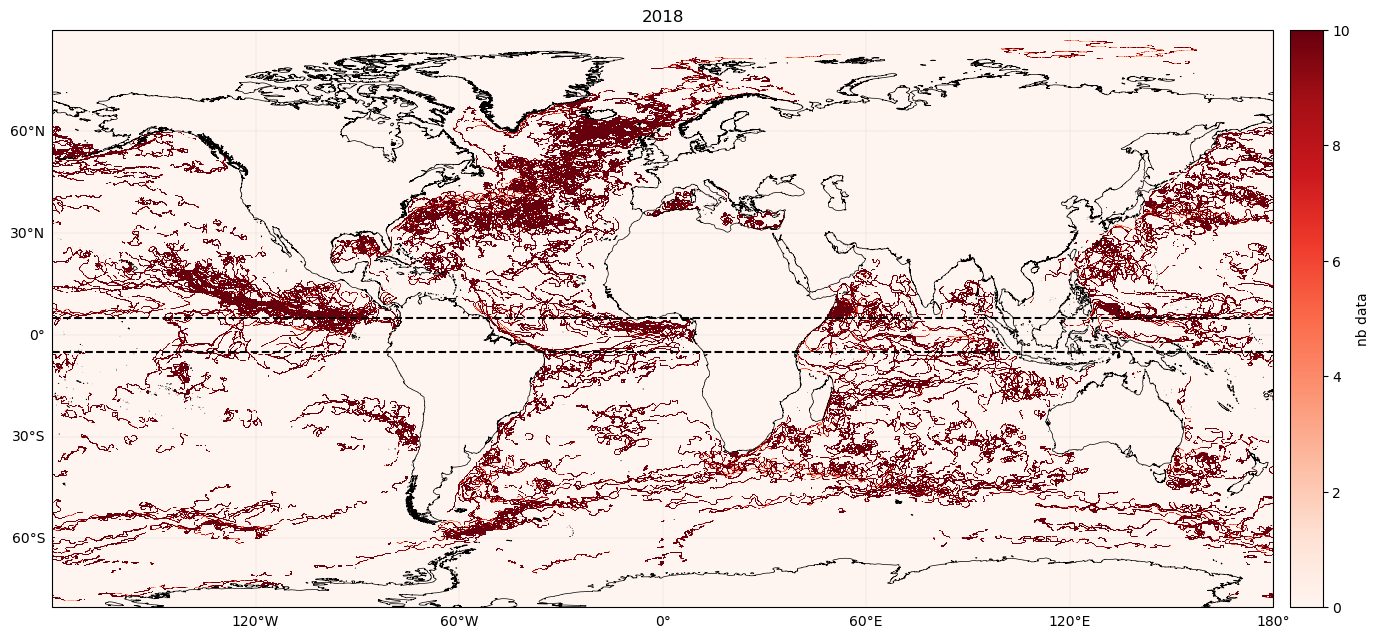

2019


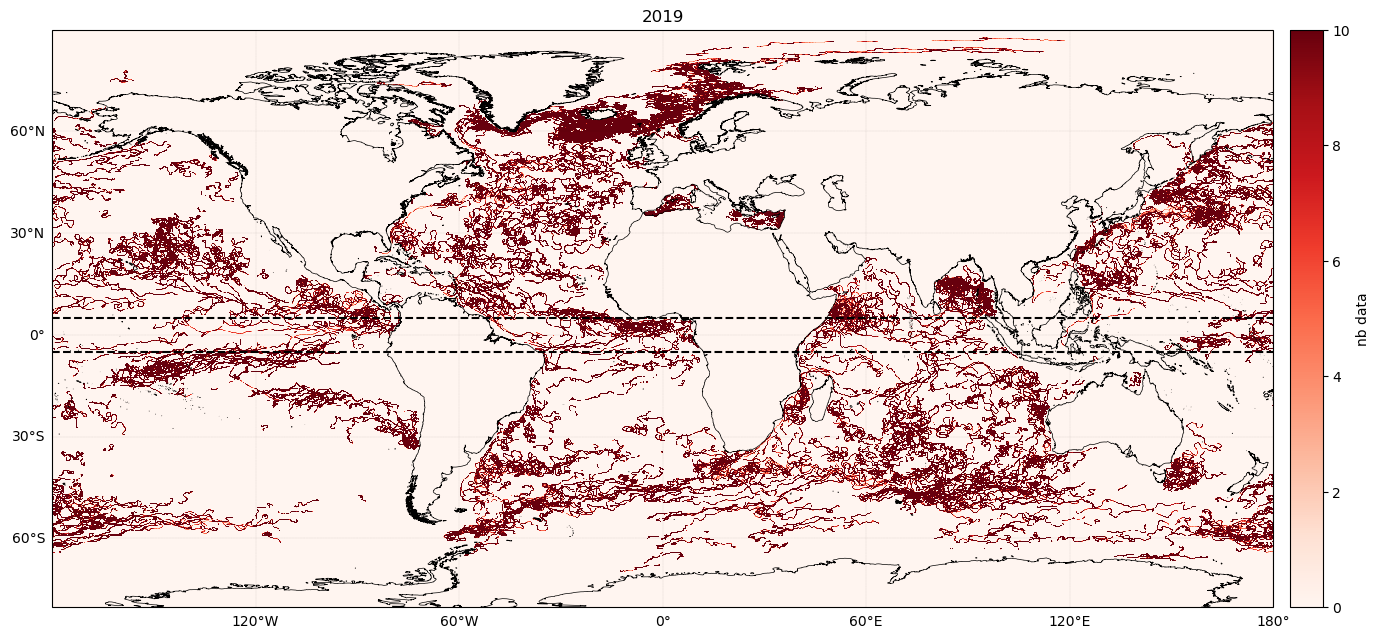

2020


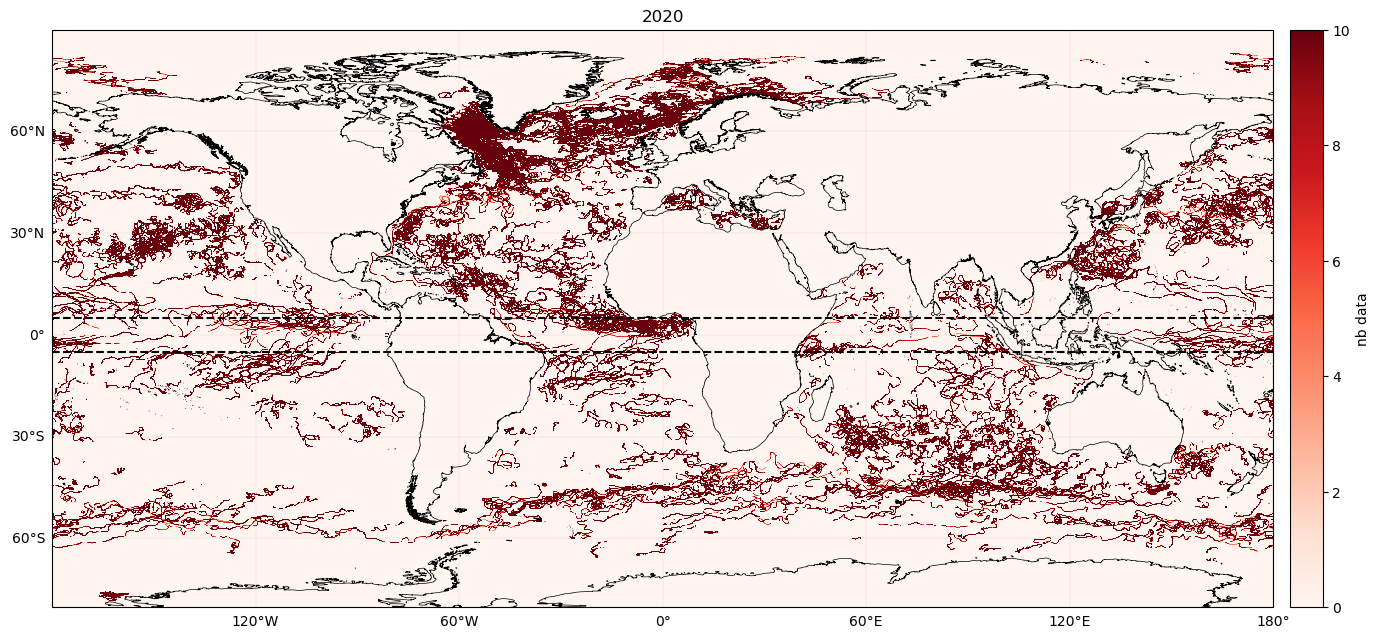

2021


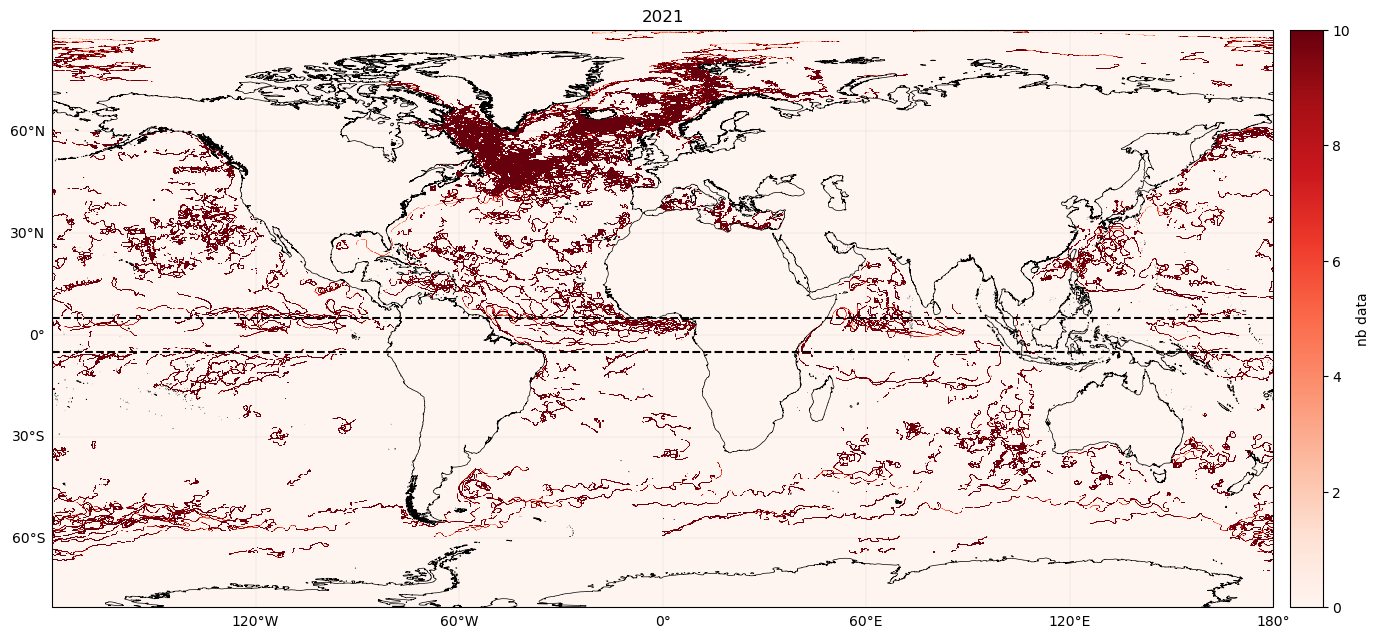

2022


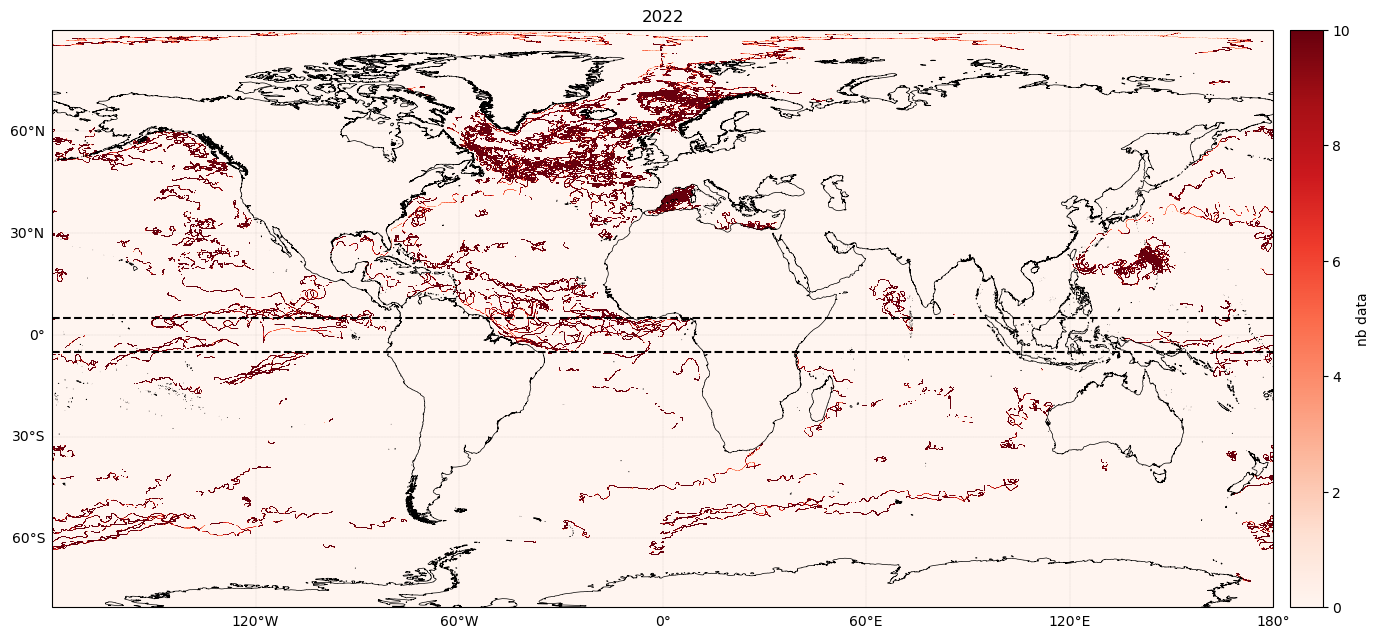

In [3]:
#year_ds_drifter = ds_drifter.sel(date=slice("2010-01-01","2010-02-01"))

for year in range(2010,2023):
    print(year)
    filenames_drifters = sorted(glob(f'/Odyssey/public/drifters/aoml/drifter_*_{year}.nc'))
    year_ds_drifter = xr.open_mfdataset(filenames_drifters, combine='nested', concat_dim='date')
    year_ds_drifter = year_ds_drifter.compute()
    year_ds_drifter_filtred = year_ds_drifter.where(year_ds_drifter['ums'] < 1000, drop=True)

    lon_bins = np.linspace(-180.125, 179.9 + 0.125, 1441)
    lat_bins = np.linspace(-80.125, 90.125, 680)

    longitude = year_ds_drifter_filtred['lon'].values
    latitude = year_ds_drifter_filtred['lat'].values

    # Calculer le nombre de données dans chaque bin 2D
    histogram, lat_edges, lon_edges = np.histogram2d(
        latitude, longitude, bins=[lat_bins, lon_bins]
    )
    # Convertir le résultat en xarray.DataArray pour une manipulation plus facile
    histogram_da = xr.DataArray(
        histogram,
        coords=[('lat_bin', lat_edges[:-1]), ('lon_bin', lon_edges[:-1])],
        dims=['lat_bin', 'lon_bin'])

    plot_uv_map(histogram_da,histogram_da.lon_bin,histogram_da.lat_bin,vmin=0,vmax=10,colorbar_title="nb data",title=year,cmap=plt.cm.Reds)

    plt.savefig(f"./plot/aoml/drifters_hist_{year}.png")
    plt.show()
  

In [ ]:
for year in range(2010,2022):
    print(year)
    filenames_drifters = sorted(glob(f'/Odyssey/private/t22picar/data/drifters/cmems/drifter_*_{year}.nc'))
    ds_drifter = xr.open_mfdataset(filenames_drifters, combine='nested', concat_dim='date')
    year_ds_drifter = ds_drifter.sel(date=ds_drifter["date.year"] == year)
    year_ds_drifter = year_ds_drifter.compute()
    year_ds_drifter_filtred = year_ds_drifter.where(year_ds_drifter['ums'] < 1000, drop=True)

    count = []
    start_date = datetime(year, 1, 1)
    #end_date = datetime(2019, 1, 1)
    end_date = datetime(year, 12, 31)
    current_date=start_date
    while current_date < end_date:
        count.append(len(list(year_ds_drifter.sel(date = current_date.strftime("%Y-%m-%d")).date)))
        current_date += timedelta(days=1)  # Ajoute 1 an (approximation)

    plt.figure(figsize=(8, 4))  # Taille de la figure (largeur, hauteur)
    plt.plot(count)
    plt.xlabel(f"days in {year}")
    plt.ylabel("nb data")

    plt.savefig(f"./plot/cmems/drifters_count_{year}.png")

2015
2016
2017
2018


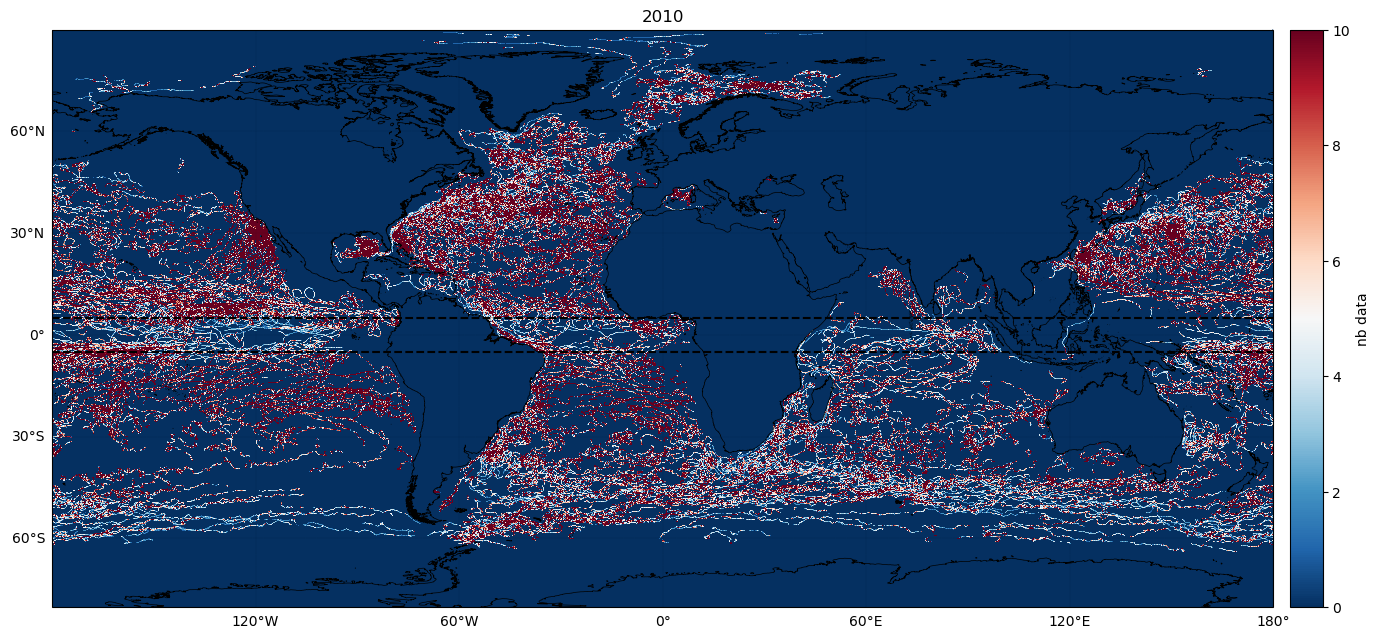

In [ ]:
#year_ds_drifter = ds_drifter.sel(date=slice("2010-01-01","2010-02-01"))

for year in range(2014,2019):

    year_ds_drifter = ds_drifter.sel(date=ds_drifter["date.year"] == year)

    lon_bins = np.linspace(-180.125, 179.9 + 0.125, 1441)
    lat_bins = np.linspace(-80.125, 90.125, 680)

    longitude = year_ds_drifter['lon'].values
    latitude = year_ds_drifter['lat'].values

    # Calculer le nombre de données dans chaque bin 2D
    histogram, lat_edges, lon_edges = np.histogram2d(
        latitude, longitude, bins=[lat_bins, lon_bins]
    )
    # Convertir le résultat en xarray.DataArray pour une manipulation plus facile
    histogram_da = xr.DataArray(
        histogram,
        coords=[('lat_bin', lat_edges[:-1]), ('lon_bin', lon_edges[:-1])],
        dims=['lat_bin', 'lon_bin'])

    plot_uv_map(histogram_da,histogram_da.lon_bin,histogram_da.lat_bin,vmin=0,vmax=10,colorbar_title="nb data",title=year)
    #plt.savefig(f"./plot/cmems/drifters_hist_{year}.png")
  

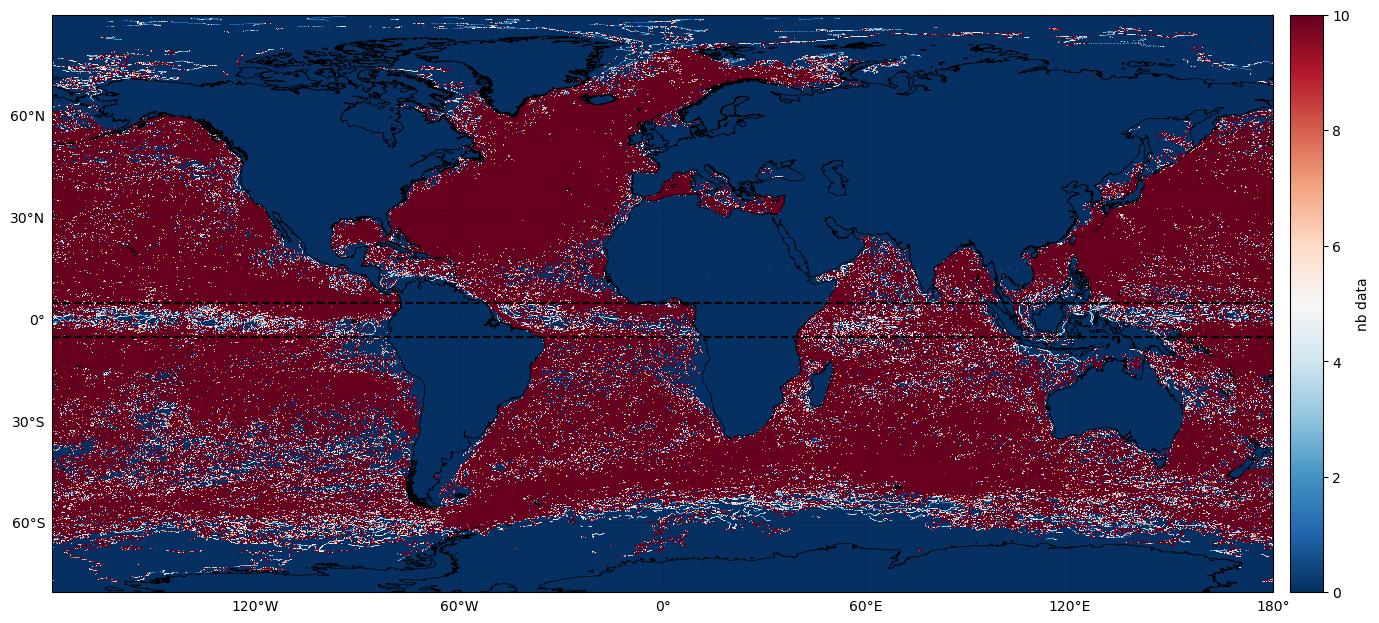

In [ ]:
lon_bins = np.linspace(-180.125, 179.9 + 0.125, 1441)
lat_bins = np.linspace(-80.125, 90.125, 680)

longitude = ds_drifter['lon'].values
latitude = ds_drifter['lat'].values

# Calculer le nombre de données dans chaque bin 2D
histogram, lat_edges, lon_edges = np.histogram2d(
    latitude, longitude, bins=[lat_bins, lon_bins]
)
# Convertir le résultat en xarray.DataArray pour une manipulation plus facile
histogram_da = xr.DataArray(
    histogram,
    coords=[('lat_bin', lat_edges[:-1]), ('lon_bin', lon_edges[:-1])],
    dims=['lat_bin', 'lon_bin'])

plot_uv_map(histogram_da,histogram_da.lon_bin,histogram_da.lat_bin,vmin=0,vmax=100,colorbar_title="nb data")

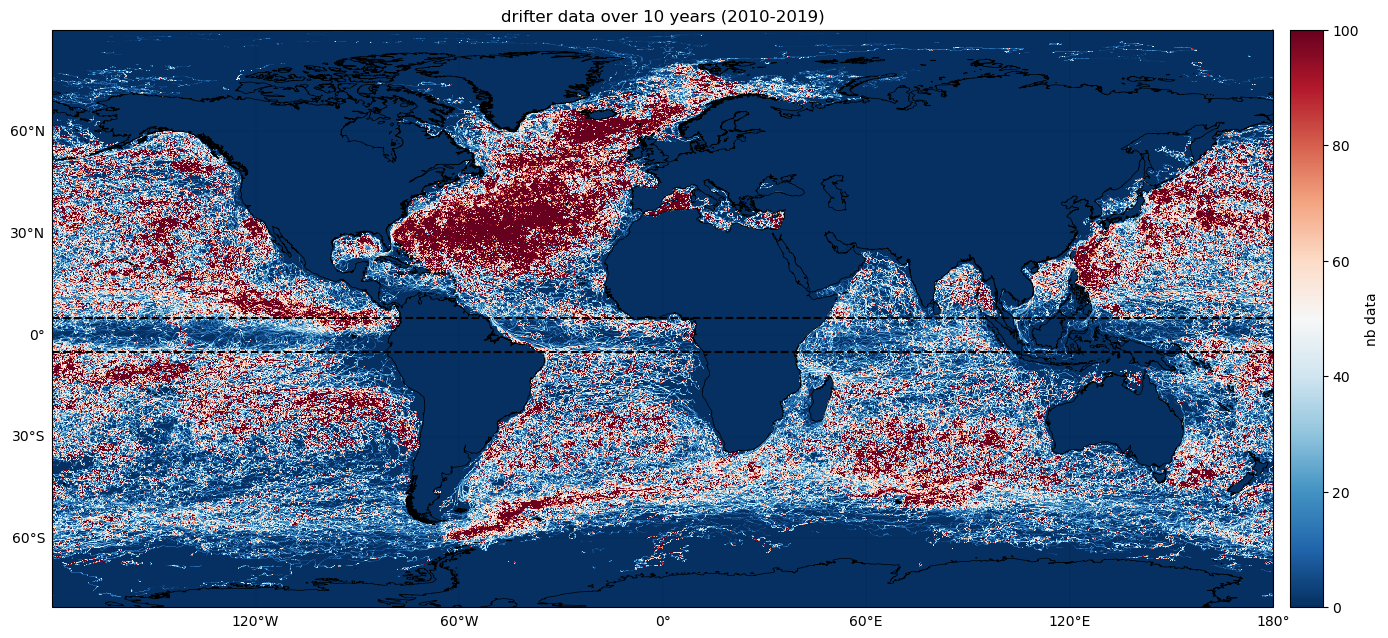

In [18]:

plot_uv_map(histogram_da,histogram_da.lon_bin,histogram_da.lat_bin,vmin=0,vmax=100,colorbar_title="nb data",title='drifter data over 10 years (2010-2019)')
plt.savefig("./plot/cmems/drifters_hist_2010-2019.png")

In [91]:
# Make daily bin map with u, v mean
#filenames_drifters = sorted(glob('/Odyssey/private/t22picar/data/drifters/cmems/drifter_*.nc'))
#ds_drifter = xr.open_mfdataset(filenames_drifters, combine='nested', concat_dim='date')
day_ds_drifter = ds_drifter.sel(date = "2010-10-10").compute()
day_ds_drifter_filtred = day_ds_drifter.where(day_ds_drifter['ums'] < 1000, drop=True)


In [102]:
day_ds_drifter

<xarray.Dataset> Size: 221kB
Dimensions:         (date: 6149)
Coordinates:
  * date            (date) datetime64[ns] 49kB 2010-10-10 ... 2010-10-10T21:0...
Data variables:
    index_time_gcp  (date) int32 25kB 1047 1048 1049 1050 ... 299 300 301 302
    lon             (date) float32 25kB -18.93 -18.93 -18.94 ... 94.46 94.48
    lat             (date) float32 25kB 30.0 30.01 30.0 ... -39.88 -39.88 -39.88
    ums             (date) float64 49kB -0.04 -0.036 0.022 ... 0.134 0.103 0.071
    vms             (date) float64 49kB 0.057 -0.015 -0.077 ... 0.026 0.159
Attributes:
    cdm_data_type:                 Trajectory
    idf_version:                   1.0
    idf_granule_id:                drifter_13515_2010.nc
    time_coverage_start:           2010-01-01T00:00:00.000000Z
    time_coverage_end:             2010-03-14T09:00:00.000000Z
    idf_subsampling_factor:        0
    idf_spatial_resolution:        10000000.0
    idf_spatial_resolution_units:  m
    processing_software:           
    netcdf_version_id:             4.7.4 of Oct 31 2021 02:46:37 $
    standard_name_vocabulary:      NetCDF Climate and Forecast (CF) Metadata ...

In [92]:
from scipy import stats
statistic,x_edge,y_edge,binnumber = stats.binned_statistic_2d(day_ds_drifter_filtred.lon.values, day_ds_drifter_filtred.lat.values, day_ds_drifter_filtred.ums.values, 'mean', bins=[lon_bins, lat_bins])

In [93]:
lon = (lon_bins[1:] + lon_bins[:-1]) / 2
lat = (lat_bins[1:] + lat_bins[:-1]) / 2

In [100]:
lon

array([-179.99994792, -179.74984375, -179.49973958, ...,  179.39973958,
        179.64984375,  179.89994792])

In [94]:
statistic.shape

(1440, 679)

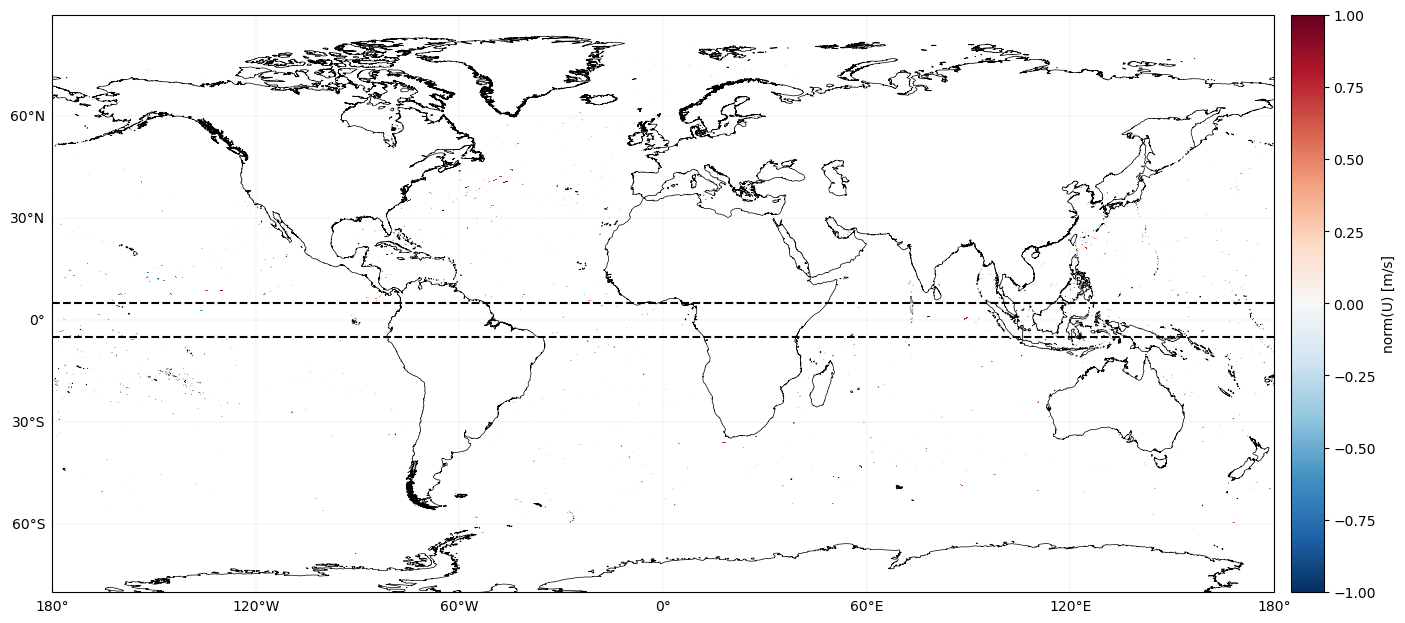

In [95]:
plot_uv_map(statistic.T,lon,lat)

In [101]:
ls "/Odyssey/private/t22picar/data/glorys_15m/"

glorys_15.81m_2019-01-01-2020-01-01.nc  glorys_multivar_15m_2015.nc
glorys_multivar_15m_2010-2018.nc        glorys_multivar_15m_2016.nc
glorys_multivar_15m_2010.nc             glorys_multivar_15m_2017.nc
glorys_multivar_15m_2011.nc             glorys_multivar_15m_2018.nc
glorys_multivar_15m_2012.nc             glorys_uv_ageos_15m_2010-2018.nc
glorys_multivar_15m_2013.nc             glorys_uv_geo_and_ageo_15m_2010-2018.nc
glorys_multivar_15m_2014.nc


In [ ]:
result_filepath = "/Odyssey/private/t22picar/data/glorys_15m/glorys_multivar_15m_2010-2018.nc"
res_data = xr.open_dataset(result_filepath)
res_data

KeyError: 'lat'